# Les Misrebles Network Analysis using NetworkX

More details at: http://networkx.readthedocs.io/en/networkx-1.10/index.html

Source: http://www-personal.umich.edu/~mejn/netdata/ and http://networkdata.ics.uci.edu/data/lesmis/
Code adopted from: https://github.com/networkx/notebooks

Citation: Les Miserables: coappearance network of characters in the novel Les Miserables. Please cite **D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993)**.

In [1]:
%matplotlib inline

from operator import itemgetter
import networkx as nx

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
from io import StringIO
import pydotplus
from IPython.display import SVG, display

In [2]:
sns.set_context("poster")
sns.set_style("ticks")

In [3]:
DATA_DIR="../data"
INPUT_NETWORK=os.path.join(DATA_DIR, "lesmis","lesmis.gml")
INPUT_NETWORK

'../data\\lesmis\\lesmis.gml'

## Reading the GML format

Please read the following about the GML format for storing networks
http://networkx.readthedocs.io/en/networkx-1.10/reference/readwrite.gml.html#format

In [4]:
G = nx.read_gml(INPUT_NETWORK)
#nx.write_gml(G, "../data/lesmis/lesmis.paj.gml")

In [5]:
df_node_degree = pd.DataFrame(list(dict(G.degree()).items()), columns=["node_name", "degree"])

In [6]:
df_node_degree.sort_values("degree", ascending=False).head(10)

,node_name,degree
11,Valjean,36
48,Gavroche,22
55,Marius,19
27,Javert,17
25,Thenardier,16
23,Fantine,15
58,Enjolras,15
64,Bossuet,13
62,Courfeyrac,13
65,Joly,12


In [7]:
print("radius: {:d}\n".format(nx.radius(G)))
print("diameter: {:d}\n".format(nx.diameter(G)))
print("eccentricity: {}\n".format(nx.eccentricity(G)))
print("center: {}\n".format(nx.center(G)))
print("periphery: {}\n".format(nx.periphery(G)))
print("density: {:f}".format(nx.density(G)))

radius: 3

diameter: 5

eccentricity: {'Myriel': 4, 'Napoleon': 5, 'MlleBaptistine': 4, 'MmeMagloire': 4, 'CountessDeLo': 5, 'Geborand': 5, 'Champtercier': 5, 'Cravatte': 5, 'Count': 5, 'OldMan': 5, 'Labarre': 4, 'Valjean': 3, 'Marguerite': 4, 'MmeDeR': 4, 'Isabeau': 4, 'Gervais': 4, 'Tholomyes': 4, 'Listolier': 5, 'Fameuil': 5, 'Blacheville': 5, 'Favourite': 5, 'Dahlia': 5, 'Zephine': 5, 'Fantine': 4, 'MmeThenardier': 4, 'Thenardier': 3, 'Cosette': 4, 'Javert': 3, 'Fauchelevent': 4, 'Bamatabois': 4, 'Perpetue': 5, 'Simplice': 4, 'Scaufflaire': 4, 'Woman1': 4, 'Judge': 4, 'Champmathieu': 4, 'Brevet': 4, 'Chenildieu': 4, 'Cochepaille': 4, 'Pontmercy': 4, 'Boulatruelle': 4, 'Eponine': 4, 'Anzelma': 4, 'Woman2': 4, 'MotherInnocent': 4, 'Gribier': 5, 'Jondrette': 5, 'MmeBurgon': 4, 'Gavroche': 3, 'Gillenormand': 4, 'Magnon': 5, 'MlleGillenormand': 4, 'MmePontmercy': 5, 'MlleVaubois': 5, 'LtGillenormand': 4, 'Marius': 3, 'BaronessT': 4, 'Mabeuf': 4, 'Enjolras': 3, 'Combeferre': 4, 'Prouvair

## Connected components

In [8]:
connected_components = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
print("{} connected components found.".format(len(connected_components)))

1 connected components found.


## Drawing the graph

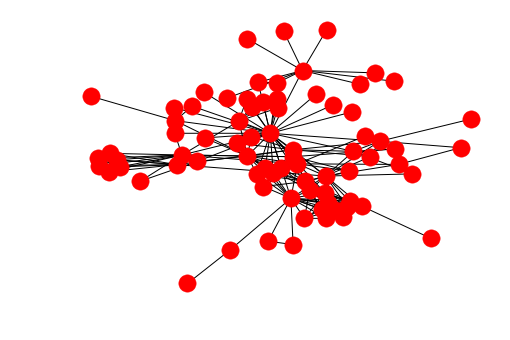

In [9]:
nx.draw(G)

(-1.0918408991594601,
 0.8896971280231096,
 -0.7830098696492152,
 1.0792972114375952)

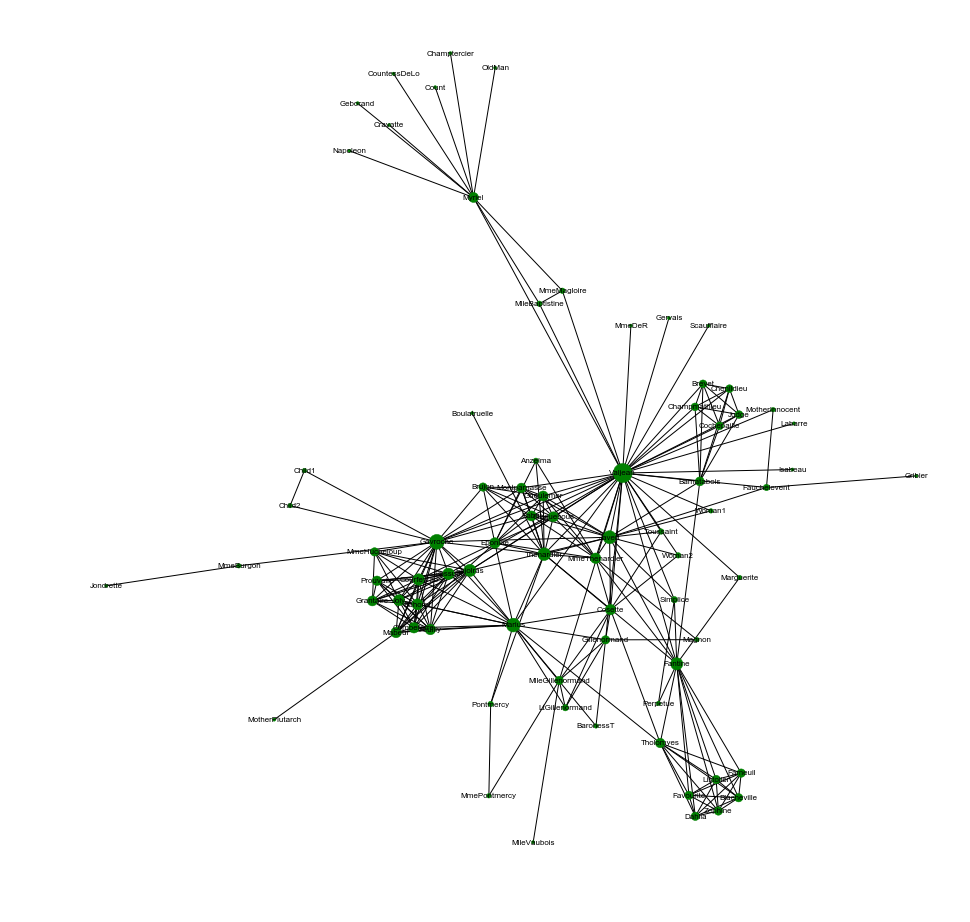

In [10]:
fig, ax = plt.subplots(1,1, figsize=(16,16))
nx.draw_networkx(
    G, with_labels=True,
    node_size=[x[1]*10 for x in G.degree()],
    pos=nx.spring_layout(G),
    node_color="g",
    font_size=8,
    ax=ax)
ax.axis("off")

In [11]:
def show_graph(G, file_path):
    dotfile = StringIO()
    nx.drawing.nx_pydot.write_dot(G, dotfile)
    pydotplus.graph_from_dot_data(dotfile.getvalue()).write_svg(file_path)
    display(SVG(file_path))

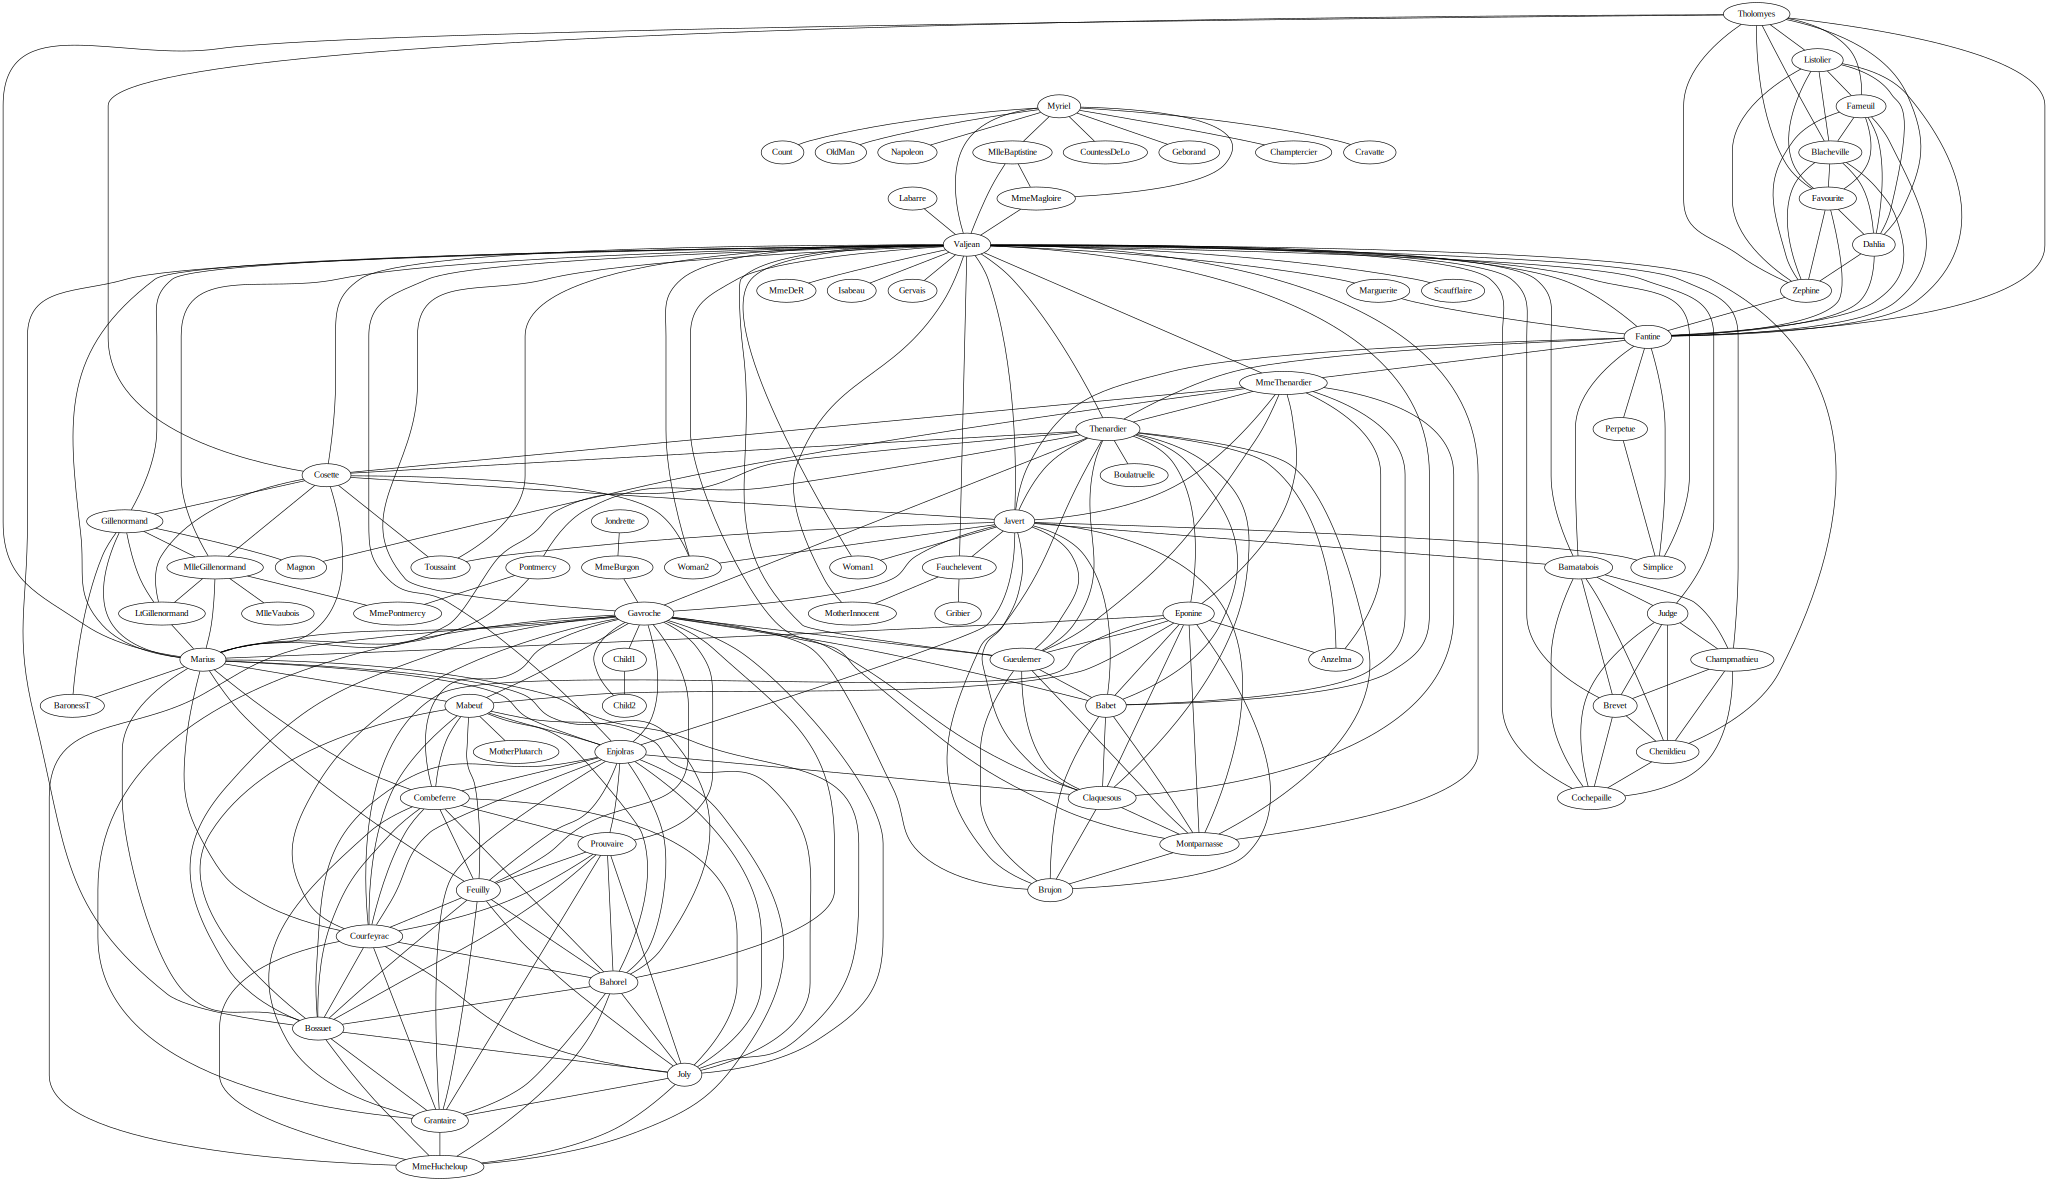

In [12]:
show_graph(G, "../output/lesmis.svg")